In [562]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from enum import Enum
import seaborn as sb
import math
%matplotlib inline

df = pd.read_csv('ums_viz.csv')
df_perf = pd.read_pickle('descriptions.pkl')
df_perf.columns.values[0] = 'perf_name'

df['perf_name'] = df['perf_name'].apply(lambda x: x.strip())
df_perf['perf_name'] = df_perf['perf_name'].apply(lambda x: x.strip())

df['per_seat'] = df['tck_amt']/df['num_seats']
df_group = df.groupby('perf_name')

# Add a whole bunch of new performance-level features

# mean ticket amount, number of seats, price per seat
df_tmp = df_group['tck_amt', 'num_seats', 'per_seat'].mean().reset_index()
df_tmp = df_tmp.rename(columns = {'tck_amt': 'mean_tck_amt', 'num_seats': 'mean_num_seats', 'per_seat': 'mean_per_seat'})

df_perf = pd.merge(df_perf, df_tmp, on='perf_name')

# max ticket amount, number of seats, price per seat
df_tmp = df_group['tck_amt', 'num_seats', 'per_seat'].max().reset_index()
df_tmp = df_tmp.rename(columns = {'tck_amt': 'max_tck_amt', 'num_seats': 'max_num_seats', 'per_seat': 'max_per_seat'})
df_perf = pd.merge(df_perf, df_tmp, on='perf_name')

# total number of seats
df_tmp = df_group['num_seats'].count().reset_index()
df_tmp = df_tmp.rename(columns = {'num_seats': 'count_tck_amt'})
df_perf = pd.merge(df_perf, df_tmp, on='perf_name')

In [428]:
class Topic(Enum):
    Chamber = 0
    Choral = 1
    Dance = 2
    Jazz = 3
    Other = 4
def label_to_enum(label):
    if label == 'Chamber':
        return Topic.Chamber
    if label == 'Choral':
        return Topic.Choral
    if label == 'Dance':
        return Topic.Dance
    if label == 'Jazz':
        return Topic.Jazz
    if label == 'Other':
        return Topic.Other
#topics from purchasing info
topics = pd.read_csv('Topics.csv', header=-1)
#out of order, sorting before putting in df_perf
in_dict = {}
for t in topics[0]:
    if t == 'Usher party':
        continue
    in_dict[t] = df_perf['perf_name'][df_perf['perf_name'] == t].index[0]
topics_sorted = list(np.arange(143))
for i in range(len(topics[0])):
    name = topics[0].loc[i]
    if name == 'Usher party':
        continue
    topics_sorted[in_dict[name]] = label_to_enum(topics.loc[i][1])
df_perf['topics'] = topics_sorted

In [89]:
df_perf

,perf_name,description,mean_tck_amt,mean_num_seats,mean_per_seat,max_tck_amt,max_num_seats,max_per_seat,count_tck_amt,topics
0,The Infernal Comedy,John Malkovich makes his UMS debut portraying ...,72.092196,1.997354,37.194444,595.0,14,75.0,1512,Topic.Choral
1,"Yuja Wang, piano",Chinese pianist Yuja Wang combines the spontan...,63.171001,2.003096,32.884830,460.0,23,56.0,969,Topic.Choral
2,London Philharmonic,The London Philharmonic returns for its first ...,77.771242,1.937255,40.968301,1000.0,50,80.0,1530,Topic.Choral
3,Hamburg Symphony,"In 1971, French composer Olivier Messiaen was ...",62.176976,1.838933,34.027619,487.5,17,65.0,1012,Topic.Choral
4,Chicago Symphony Orc,Wind players of the Chicago Symphony come toge...,110.584576,1.914630,56.604253,14960.0,187,120.0,3151,Topic.Choral
5,San Francisco Sympho,Michael Tilson Thomas and the San Francisco Sy...,70.300088,1.840749,38.253759,2137.5,47,85.0,4540,Topic.Choral
6,Pavel Haas Quartet,“The world’s most exciting string quartet? Wel...,52.089516,1.725806,29.705914,220.5,7,42.0,372,Topic.Chamber
7,Ballet Preljocaj,Few audience members in attendance at Ballet P...,56.356970,1.902251,28.629358,384.0,14,54.0,2977,Topic.Dance
8,Joshua Bell,"Often referred to as a “poet of the violin,” J...",105.120187,2.039090,52.261669,1000.0,45,100.0,1714,Topic.Choral
9,Murray Perahia,In the more than 35 years he has been performi...,76.766534,1.833067,41.964217,476.0,12,75.0,1252,Topic.Choral


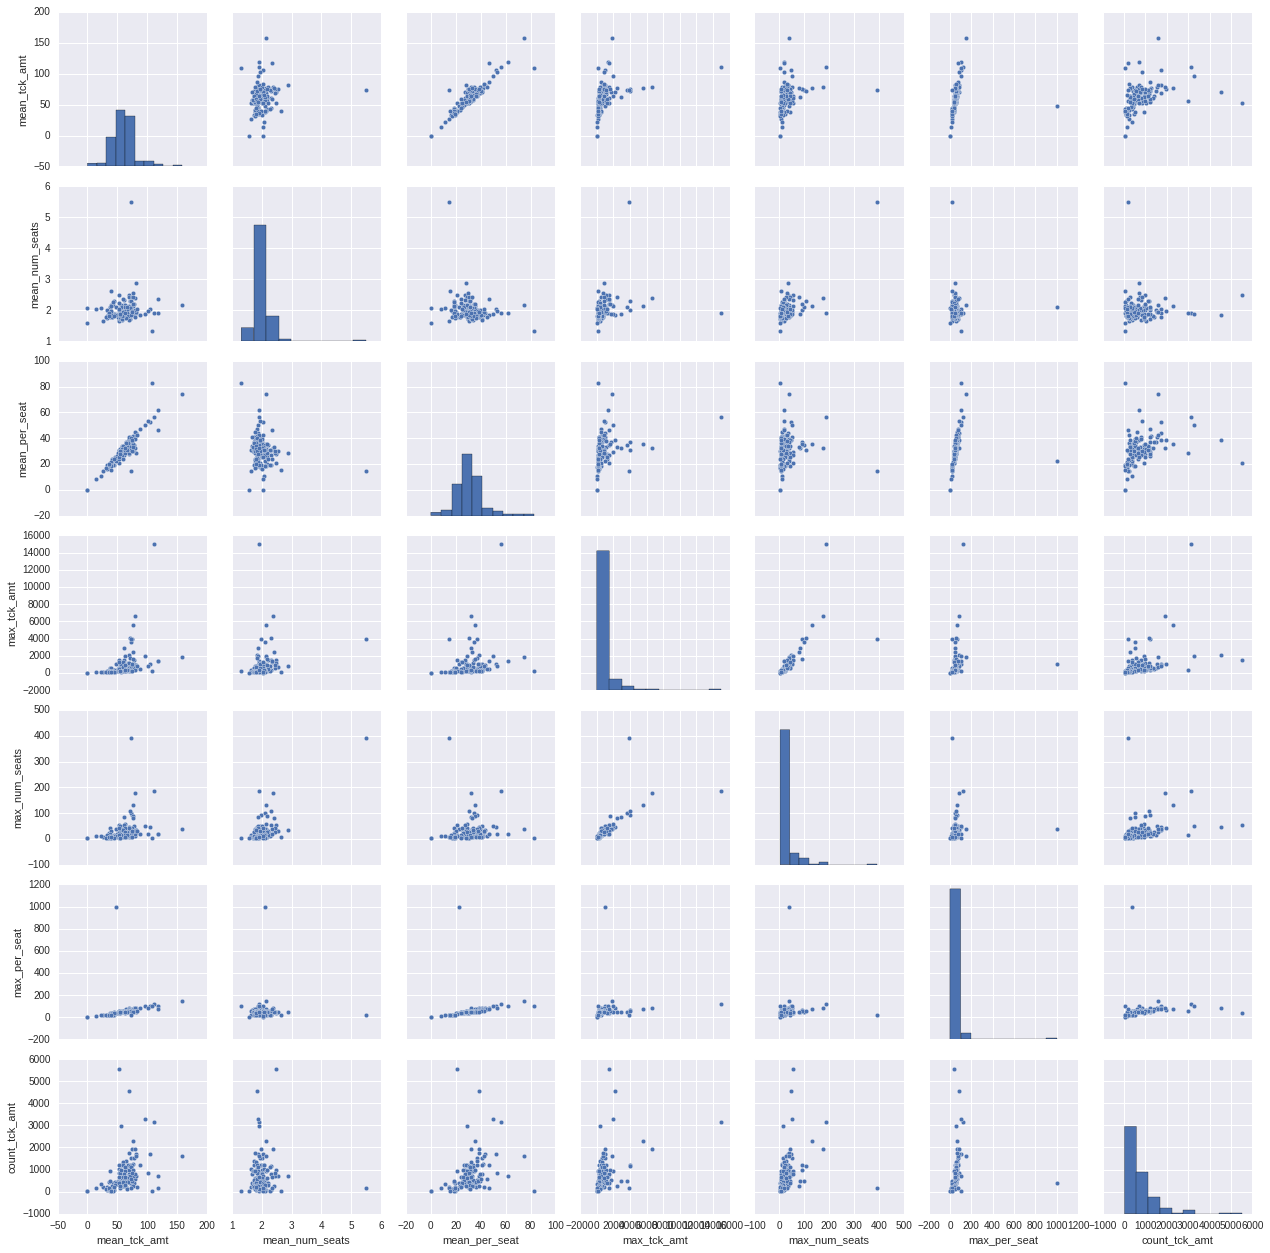

In [85]:
sb.pairplot(df_perf)

In [360]:
df

,UMS_acct_no,acct_created,cust_type,perf_name,perf_dt,tck_amt,num_seats,venue,price_type,price_type_group,mode_of_sale,sales_channel,order_dt,postal_code,per_seat
0,1111,1979-08-06 00:00:00.000,Household,The Infernal Comedy,2011-10-01 20:00:00.000,112.0,2,Hill Auditorium,Choral Union,Subs Prices,Subscription,Fax,2011-05-31 00:00:00.000,48103,56.0
1,1111,1979-08-06 00:00:00.000,Household,"Yuja Wang, piano",2011-10-09 16:00:00.000,80.0,2,Hill Auditorium,Choral Union,Subs Prices,Subscription,Fax,2011-05-31 00:00:00.000,48103,40.0
2,1111,1979-08-06 00:00:00.000,Household,London Philharmonic,2011-12-06 19:30:00.000,112.0,2,Hill Auditorium,Choral Union,Subs Prices,Subscription,Fax,2011-05-31 00:00:00.000,48103,56.0
3,1111,1979-08-06 00:00:00.000,Household,Hamburg Symphony,2012-01-29 16:00:00.000,92.0,2,Hill Auditorium,Choral Union,Subs Prices,Subscription,Fax,2011-05-31 00:00:00.000,48103,46.0
4,1111,1979-08-06 00:00:00.000,Household,Chicago Symphony Orc,2012-03-09 20:00:00.000,140.0,2,Hill Auditorium,Choral Union,Subs Prices,Subscription,Fax,2011-05-31 00:00:00.000,48103,70.0
5,1111,1979-08-06 00:00:00.000,Household,San Francisco Sympho,2012-03-23 20:00:00.000,56.0,1,Hill Auditorium,Choral Union,Subs Prices,Subscription,Fax,2011-05-31 00:00:00.000,48103,56.0
6,1111,1979-08-06 00:00:00.000,Household,San Francisco Sympho,2012-03-24 20:00:00.000,112.0,2,Hill Auditorium,Choral Union,Subs Prices,Subscription,Fax,2011-05-31 00:00:00.000,48103,56.0
7,1111,1979-08-06 00:00:00.000,Household,Pavel Haas Quartet,2012-04-18 19:30:00.000,72.0,2,Rackham Auditorium,Adult,Regular Prices,Phone/Mail,Phone,2012-03-02 09:04:00.000,48103,36.0
8,1111,1979-08-06 00:00:00.000,Household,Ballet Preljocaj,2012-04-21 20:00:00.000,96.0,2,Power Center,Adult inc 1,Regular Prices,Subs Return/Exchange,Walk Up - League,2012-03-21 12:04:06.000,48103,48.0
9,1111,1979-08-06 00:00:00.000,Household,Joshua Bell,2012-04-22 16:00:00.000,112.0,2,Hill Auditorium,Choral Union,Subs Prices,Subscription,Fax,2011-05-31 00:00:00.000,48103,56.0


In [369]:
for index, row in df[df['UMS_acct_no']==1115].iterrows():
    print row['price_type_group']

Regular Prices
Subs Prices
Subs Prices
Subs Prices
Subs Prices
Subs Prices
Subs Prices
Subs Prices
Subs Prices
Subs Prices
Subs Prices
Subs Prices
Subs Prices
Subs Prices
Subs Prices
Subs Prices
Subs Prices
Subs Prices
Subs Prices
Subs Prices
Subs Prices
Subs Prices
Subs Prices
Subs Prices
Subs Prices
Subs Prices
Subs Prices
Subs Prices
Subs Prices
Subs Prices
Subs Prices
Subs Prices
Subs Prices


In [393]:
def acctBuys(df, acct_num, dollars = False, include_subscription=True):
    class_dict = Counter({})
    acct_table = df[df['UMS_acct_no'] == acct_num]
    if dollars:
        amount_type = 'tck_amt'
    else:
        amount_type = 'num_seats'
    for show in set(acct_table['perf_name'].values):
        ct = 0
        for index, row in acct_table[acct_table['perf_name']==show].iterrows():
            if not include_subscription:
                if row['price_type_group'] == 'Subs Prices':
                    continue
            ct += row[amount_type]
        #get type
        t = topics[topics[0] == show][1].values[0]
        class_dict[t] += ct
    return class_dict
def norm_counter(ct):
    new = Counter({})
    if sum(ct.values(), 0.0) == 0:
        return ct
    for key in ct:
        new[key] = ct[key]/sum(ct.values(), 0.0)
    return new
#get primary ticket type and cross spending
def crossSpending(acct, norm=False):
    cross_dict = {}
    major_class = acct.most_common(1)[0][0]
    cross_dict[major_class] = Counter({})
    for key in acct:
        cross_dict[major_class][key] = acct[key]
    if norm:
        cross_dict[major_class] = norm_counter(cross_dict[major_class])
    return cross_dict
def join_cross(a, b):
    new = {}
    for key in a:
        new[key] = a[key]
    for key in b:
        if key in new:
            new[key] += b[key]
        else:
            new[key] = b[key]
    return new

In [378]:
big_acct_dict = {}
x = 0
for acct in set(df['UMS_acct_no'].values):
    x += 1
    if x%100 == 0:
        print x
    big_acct_dict[acct] = acctBuys(df, acct, include_subscription=False)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
1850

In [394]:
cross_dict = {}
x = 0
for key in big_acct_dict:
    x+=1
    if x%100 == 0:
        print x
    cross_dict = join_cross(cross_dict, crossSpending(big_acct_dict[key], norm=True))

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
1850

In [395]:
cross_dict

{'Chamber': Counter({'Chamber': 740.6507022429153,
          'Choral': 115.12230592327715,
          'Dance': 9.51129850473756,
          'Jazz': 20.385790397701484,
          'Other': 94.32990293136919}),
 'Choral': Counter({'Chamber': 176.03911045271752,
          'Choral': 7413.117097950299,
          'Dance': 122.92875363736188,
          'Jazz': 193.54427388187761,
          'Other': 796.3707640777928}),
 'Dance': Counter({'Chamber': 26.722259693511237,
          'Choral': 125.60445729374207,
          'Dance': 2893.4172956119087,
          'Jazz': 48.01387716571691,
          'Other': 262.242110235122}),
 'Jazz': Counter({'Chamber': 7.4549052193199286,
          'Choral': 42.431161592497645,
          'Dance': 11.379689498130416,
          'Jazz': 2111.386793040288,
          'Other': 116.3474506497652}),
 'Other': Counter({'Chamber': 100.15965986666298,
          'Choral': 447.13095372382287,
          'Dance': 213.5184787186495,
          'Jazz': 280.7919044762959,
          'O

In [376]:
total = Counter({})
for key in cross_dict:
    total += cross_dict[key]

In [493]:
def pie_from_counter(ct, name, title=None):
    labels = ct.keys()
    sizes = ct.values()
    explode = tuple((int(key==name)*0.1 for key in labels))
    plt.pie(sizes, explode=explode, labels=labels,
        autopct='%1.1f%%', shadow=True, startangle=90)
    if title is None:
        plt.title('Ticket percentages for those who mainly buy '+name+' tickets')
    else:
        plt.title(title)

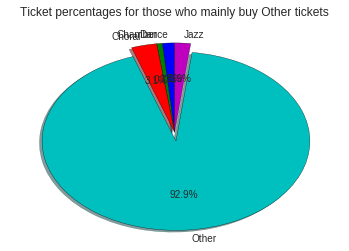

In [491]:
pie_from_counter(cross_dict['Other'], 'Other')

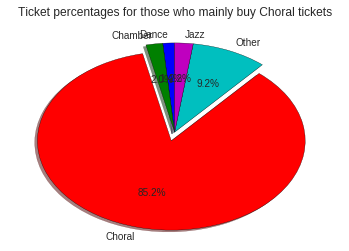

In [397]:
pie_from_counter(cross_dict['Choral'], 'Choral')

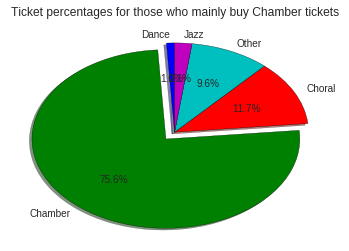

In [398]:
pie_from_counter(cross_dict['Chamber'], 'Chamber')

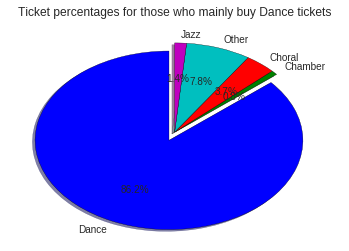

In [399]:
pie_from_counter(cross_dict['Dance'], 'Dance')

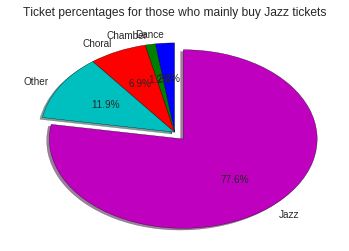

In [354]:
pie_from_counter(cross_dict['Jazz'], 'Jazz')

In [355]:
df

,UMS_acct_no,acct_created,cust_type,perf_name,perf_dt,tck_amt,num_seats,venue,price_type,price_type_group,mode_of_sale,sales_channel,order_dt,postal_code,per_seat
0,1111,1979-08-06 00:00:00.000,Household,The Infernal Comedy,2011-10-01 20:00:00.000,112.0,2,Hill Auditorium,Choral Union,Subs Prices,Subscription,Fax,2011-05-31 00:00:00.000,48103,56.0
1,1111,1979-08-06 00:00:00.000,Household,"Yuja Wang, piano",2011-10-09 16:00:00.000,80.0,2,Hill Auditorium,Choral Union,Subs Prices,Subscription,Fax,2011-05-31 00:00:00.000,48103,40.0
2,1111,1979-08-06 00:00:00.000,Household,London Philharmonic,2011-12-06 19:30:00.000,112.0,2,Hill Auditorium,Choral Union,Subs Prices,Subscription,Fax,2011-05-31 00:00:00.000,48103,56.0
3,1111,1979-08-06 00:00:00.000,Household,Hamburg Symphony,2012-01-29 16:00:00.000,92.0,2,Hill Auditorium,Choral Union,Subs Prices,Subscription,Fax,2011-05-31 00:00:00.000,48103,46.0
4,1111,1979-08-06 00:00:00.000,Household,Chicago Symphony Orc,2012-03-09 20:00:00.000,140.0,2,Hill Auditorium,Choral Union,Subs Prices,Subscription,Fax,2011-05-31 00:00:00.000,48103,70.0
5,1111,1979-08-06 00:00:00.000,Household,San Francisco Sympho,2012-03-23 20:00:00.000,56.0,1,Hill Auditorium,Choral Union,Subs Prices,Subscription,Fax,2011-05-31 00:00:00.000,48103,56.0
6,1111,1979-08-06 00:00:00.000,Household,San Francisco Sympho,2012-03-24 20:00:00.000,112.0,2,Hill Auditorium,Choral Union,Subs Prices,Subscription,Fax,2011-05-31 00:00:00.000,48103,56.0
7,1111,1979-08-06 00:00:00.000,Household,Pavel Haas Quartet,2012-04-18 19:30:00.000,72.0,2,Rackham Auditorium,Adult,Regular Prices,Phone/Mail,Phone,2012-03-02 09:04:00.000,48103,36.0
8,1111,1979-08-06 00:00:00.000,Household,Ballet Preljocaj,2012-04-21 20:00:00.000,96.0,2,Power Center,Adult inc 1,Regular Prices,Subs Return/Exchange,Walk Up - League,2012-03-21 12:04:06.000,48103,48.0
9,1111,1979-08-06 00:00:00.000,Household,Joshua Bell,2012-04-22 16:00:00.000,112.0,2,Hill Auditorium,Choral Union,Subs Prices,Subscription,Fax,2011-05-31 00:00:00.000,48103,56.0


In [450]:
df_perf[df_perf['perf_name']=='Usher party']

,perf_name,description,mean_tck_amt,mean_num_seats,mean_per_seat,max_tck_amt,max_num_seats,max_per_seat,count_tck_amt,topics


In [474]:
#checking out new topics
new_topics = pd.read_csv('wikipediaTopicModel1.csv')
del new_topics['Unnamed: 0']
new_topics['name'] = df_perf['perf_name']
new_topics = new_topics.drop(143)

In [475]:
new_topics

,showId,topic0,topic1,topic2,topic3,topic4,name
0,0,0.151650,0.627555,0.000597,0.126922,0.093276,The Infernal Comedy
1,1,0.248947,0.569644,0.136964,0.044142,0.000303,"Yuja Wang, piano"
2,2,0.023808,0.776028,0.000090,0.199984,0.000090,London Philharmonic
3,3,0.041147,0.955740,0.001030,0.001041,0.001043,Hamburg Symphony
4,4,0.008272,0.972533,0.000211,0.000212,0.018772,Chicago Symphony Orc
5,5,0.017986,0.975182,0.000107,0.006618,0.000107,San Francisco Sympho
6,6,0.998832,0.000293,0.000289,0.000294,0.000292,Pavel Haas Quartet
7,7,0.000894,0.346599,0.000857,0.212948,0.438702,Ballet Preljocaj
8,8,0.000304,0.128079,0.820126,0.051186,0.000305,Joshua Bell
9,9,0.882529,0.116780,0.000229,0.000231,0.000231,Murray Perahia


In [480]:
def max_topic(row):
    topic_names = ['topic0', 'topic1','topic2','topic3', 'topic4']
    mx = -1
    mx_top = None
    for t in topic_names:
        if row[t] > mx:
            mx = row[t]
            mx_top = t
    return mx_top
#get majority topic, compare with topics
new_max_topics = {}
new_disc_topics = []
for index, row in new_topics.iterrows():
    print row['name']
    new_max_topics[row['name']] = max_topic(row)
    new_disc_topics.append(max_topic(row))

The Infernal Comedy
Yuja Wang, piano
London Philharmonic
Hamburg Symphony
Chicago Symphony Orc
San Francisco Sympho
Pavel Haas Quartet
Ballet Preljocaj
Joshua Bell
Murray Perahia
Mariinsky Orchestra
Detroit Symphony Orc
New York Philharmoni
Artemis Quartet
Anne-Sophie Mutter,
Bobby McFerrin
Alison Balsom
SITI: Trojan Women
Audra McDonald
Andras Schiff, piano
Apollo's Fire
Joshua Bell, violin
St Petersburg Philha
Israel Philharmonic
Akademie fur Alte Mu
Olga Kern, piano
Kremerata Baltica
Tara Erraught, mezzo
Denis Matsuev, piano
Handel's Radamisto
Milhaud's Oresteian
Random Dance
Hagen Quartet
Handel's Messiah
Propeller: Twelfth N
St Lawrence Quartet
Belcea Quartet
NT - The Audience
Gate Theatre
Stile Antico
Einstein on the Beac
Chamber Ens of the S
Zakir Hussain
Aspen Santa Fe Balle
Rhinoceros
Gilberto Gil
Prudencia Hart
Martha Graham Dance
Mariachi Vargas de T
The Silk Road Ensemb
Ragamala Dance
Complicite
Chris Thile
Blind Summit
RSC in HD - Richard
State Symphony Capel
New Century C

In [481]:
#get topic similarity
topic_similarity = {}
for show in new_max_topics:
    t = topics[topics[0] == show][1].values[0]
    if t not in topic_similarity:
        topic_similarity[t] = Counter({})
    nt = new_max_topics[show]
    topic_similarity[t].update([nt])

In [482]:
topic_similarity

{'Chamber': Counter({'topic0': 12, 'topic1': 6}),
 'Choral': Counter({'topic0': 6, 'topic1': 17, 'topic2': 2, 'topic3': 1}),
 'Dance': Counter({'topic1': 3, 'topic4': 7}),
 'Jazz': Counter({'topic1': 5, 'topic4': 7}),
 'Other': Counter({'topic1': 34, 'topic2': 4, 'topic3': 32, 'topic4': 7})}

In [445]:
new_topics

,showId,topic0,topic1,topic2,topic3,name
0,0,0.545047,0.050504,0.000777,0.403672,The Infernal Comedy
1,1,0.085252,0.016094,0.000381,0.898274,"Yuja Wang, piano"
2,2,0.889523,0.000120,0.000200,0.110158,London Philharmonic
3,3,0.749963,0.001239,0.001228,0.247570,Hamburg Symphony
4,4,0.430856,0.000270,0.000275,0.568600,Chicago Symphony Orc
5,5,0.660115,0.058543,0.056984,0.224358,San Francisco Sympho
6,6,0.079657,0.000366,0.675723,0.244255,Pavel Haas Quartet
7,7,0.344939,0.396830,0.184246,0.073984,Ballet Preljocaj
8,8,0.028284,0.409773,0.017928,0.544015,Joshua Bell
9,9,0.217973,0.000262,0.398095,0.383670,Murray Perahia


In [409]:
df_perf['perf_name']

0       The Infernal Comedy
1          Yuja Wang, piano
2       London Philharmonic
3          Hamburg Symphony
4      Chicago Symphony Orc
5      San Francisco Sympho
6        Pavel Haas Quartet
7          Ballet Preljocaj
8               Joshua Bell
9            Murray Perahia
10      Mariinsky Orchestra
11     Detroit Symphony Orc
12     New York Philharmoni
13          Artemis Quartet
14      Anne-Sophie Mutter,
15           Bobby McFerrin
16            Alison Balsom
17       SITI: Trojan Women
18           Audra McDonald
19     Andras Schiff, piano
20            Apollo's Fire
21      Joshua Bell, violin
22     St Petersburg Philha
23      Israel Philharmonic
24     Akademie fur Alte Mu
25         Olga Kern, piano
26        Kremerata Baltica
27     Tara Erraught, mezzo
28     Denis Matsuev, piano
29       Handel's Radamisto
               ...         
113        Ensemble Basiani
114    Jason Moran's Fats W
115    Dan Zanes and Friend
116               Max Raabe
117    NT - Last of 

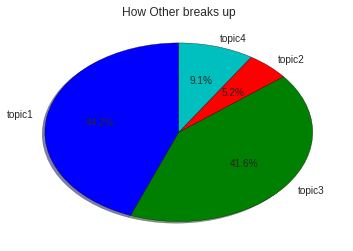

In [495]:
pie_from_counter(topic_similarity['Other'], 'Chamber', 'How Other breaks up')

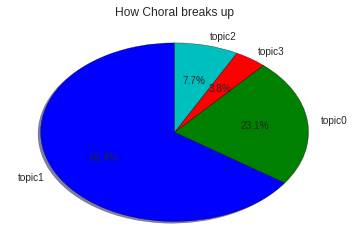

In [496]:
pie_from_counter(topic_similarity['Choral'], 'Chamber', 'How Choral breaks up')

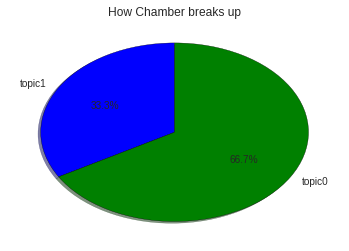

In [497]:
pie_from_counter(topic_similarity['Chamber'], 'Chamber', 'How Chamber breaks up')

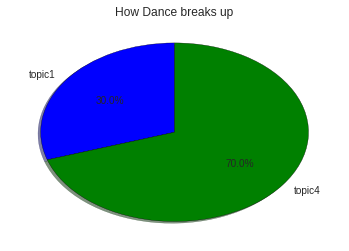

In [498]:
pie_from_counter(topic_similarity['Dance'], 'Chamber', 'How Dance breaks up')

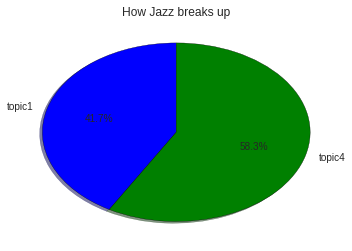

In [500]:
pie_from_counter(topic_similarity['Jazz'], 'Chamber', 'How Jazz breaks up')

In [504]:
df

,UMS_acct_no,acct_created,cust_type,perf_name,perf_dt,tck_amt,num_seats,venue,price_type,price_type_group,mode_of_sale,sales_channel,order_dt,postal_code,per_seat
0,1111,1979-08-06 00:00:00.000,Household,The Infernal Comedy,2011-10-01 20:00:00.000,112.0,2,Hill Auditorium,Choral Union,Subs Prices,Subscription,Fax,2011-05-31 00:00:00.000,48103,56.0
1,1111,1979-08-06 00:00:00.000,Household,"Yuja Wang, piano",2011-10-09 16:00:00.000,80.0,2,Hill Auditorium,Choral Union,Subs Prices,Subscription,Fax,2011-05-31 00:00:00.000,48103,40.0
2,1111,1979-08-06 00:00:00.000,Household,London Philharmonic,2011-12-06 19:30:00.000,112.0,2,Hill Auditorium,Choral Union,Subs Prices,Subscription,Fax,2011-05-31 00:00:00.000,48103,56.0
3,1111,1979-08-06 00:00:00.000,Household,Hamburg Symphony,2012-01-29 16:00:00.000,92.0,2,Hill Auditorium,Choral Union,Subs Prices,Subscription,Fax,2011-05-31 00:00:00.000,48103,46.0
4,1111,1979-08-06 00:00:00.000,Household,Chicago Symphony Orc,2012-03-09 20:00:00.000,140.0,2,Hill Auditorium,Choral Union,Subs Prices,Subscription,Fax,2011-05-31 00:00:00.000,48103,70.0
5,1111,1979-08-06 00:00:00.000,Household,San Francisco Sympho,2012-03-23 20:00:00.000,56.0,1,Hill Auditorium,Choral Union,Subs Prices,Subscription,Fax,2011-05-31 00:00:00.000,48103,56.0
6,1111,1979-08-06 00:00:00.000,Household,San Francisco Sympho,2012-03-24 20:00:00.000,112.0,2,Hill Auditorium,Choral Union,Subs Prices,Subscription,Fax,2011-05-31 00:00:00.000,48103,56.0
7,1111,1979-08-06 00:00:00.000,Household,Pavel Haas Quartet,2012-04-18 19:30:00.000,72.0,2,Rackham Auditorium,Adult,Regular Prices,Phone/Mail,Phone,2012-03-02 09:04:00.000,48103,36.0
8,1111,1979-08-06 00:00:00.000,Household,Ballet Preljocaj,2012-04-21 20:00:00.000,96.0,2,Power Center,Adult inc 1,Regular Prices,Subs Return/Exchange,Walk Up - League,2012-03-21 12:04:06.000,48103,48.0
9,1111,1979-08-06 00:00:00.000,Household,Joshua Bell,2012-04-22 16:00:00.000,112.0,2,Hill Auditorium,Choral Union,Subs Prices,Subscription,Fax,2011-05-31 00:00:00.000,48103,56.0


In [575]:
#question: do people see more shows after seeing one, or do they wait
def acctSeries(df, acct):
    time_arr = df[df['UMS_acct_no']==acct]['perf_dt'].values
    parsed = [datetime.datetime.strptime(t, '%Y-%m-%d %H:%M:%S.000') for t in time_arr]
    return np.diff(parsed)

In [533]:
big_series_dict = {}
x = 0
for acct in set(df['UMS_acct_no'].values):
    x += 1
    if x%100 == 0:
        print x
    big_series_dict[acct] = acctSeries(df, acct)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
1850

In [571]:
def meanTime(arr):
    if len(arr) == 0:
        return 0
    return sum(arr, datetime.timedelta(0)) / len(arr)
def medianTime(arr):
    if len(arr) == 0:
        return 0
    mid = int(len(arr)/2.0-1)
    return sorted(arr)[mid]

In [572]:
points = []
for key in big_series_dict:
    points.append((meanTime(big_series_dict[key]),medianTime(big_series_dict[key])))

In [574]:
points

[(0, 0),
 (0, 0),
 (datetime.timedelta(74, 17280), datetime.timedelta(0)),
 (datetime.timedelta(602), datetime.timedelta(602)),
 (0, 0),
 (datetime.timedelta(202, 84600), datetime.timedelta(21)),
 (0, 0),
 (datetime.timedelta(8), datetime.timedelta(8)),
 (0, 0),
 (datetime.timedelta(92, 72000), datetime.timedelta(92, 72000)),
 (0, 0),
 (0, 0),
 (0, 0),
 (datetime.timedelta(42), datetime.timedelta(42)),
 (datetime.timedelta(151), datetime.timedelta(0)),
 (datetime.timedelta(66, 12600), datetime.timedelta(66, 12600)),
 (datetime.timedelta(0), datetime.timedelta(0)),
 (datetime.timedelta(0), datetime.timedelta(0)),
 (0, 0),
 (0, 0),
 (datetime.timedelta(345, 19800), datetime.timedelta(345, 19800)),
 (datetime.timedelta(42), datetime.timedelta(42)),
 (0, 0),
 (datetime.timedelta(52, 43200), datetime.timedelta(0)),
 (datetime.timedelta(253, 58200), datetime.timedelta(0)),
 (0, 0),
 (datetime.timedelta(21), datetime.timedelta(21)),
 (datetime.timedelta(56, 36000), datetime.timedelta(21)),
 (

In [576]:
big_series_dict

{262144: array([], dtype=object),
 262145: array([], dtype=object),
 262147: array([datetime.timedelta(137, 84600), datetime.timedelta(0),
        datetime.timedelta(225, 1800), datetime.timedelta(0),
        datetime.timedelta(8)], dtype=object),
 131076: array([datetime.timedelta(602)], dtype=object),
 262149: array([], dtype=object),
 262150: array([datetime.timedelta(0), datetime.timedelta(21),
        datetime.timedelta(747, 14400), datetime.timedelta(43, 64800)], dtype=object),
 131080: array([], dtype=object),
 131082: array([datetime.timedelta(8)], dtype=object),
 262155: array([], dtype=object),
 262157: array([datetime.timedelta(92, 72000)], dtype=object),
 262158: array([], dtype=object),
 262159: array([], dtype=object),
 131088: array([], dtype=object),
 262161: array([datetime.timedelta(42)], dtype=object),
 131090: array([datetime.timedelta(27), datetime.timedelta(86, 84600),
        datetime.timedelta(641, 1800), datetime.timedelta(0),
        datetime.timedelta(0)], dt

In [577]:
df[df['UMS_acct_no'] == 262144]

,UMS_acct_no,acct_created,cust_type,perf_name,perf_dt,tck_amt,num_seats,venue,price_type,price_type_group,mode_of_sale,sales_channel,order_dt,postal_code,per_seat
96153,262144,2013-10-19 11:50:37.387,Individual,James Blake,2013-11-11 19:30:00.000,88.0,2,Michigan Theater,Adult,Regular Prices,Walk Up,Walk Up - League,2013-10-19 11:49:31.000,48105,44.0
